<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Ali Ghelichkhani <br>
   **Student ID**:  <br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)


(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

Text(0.5, 0.98, '40 faces')

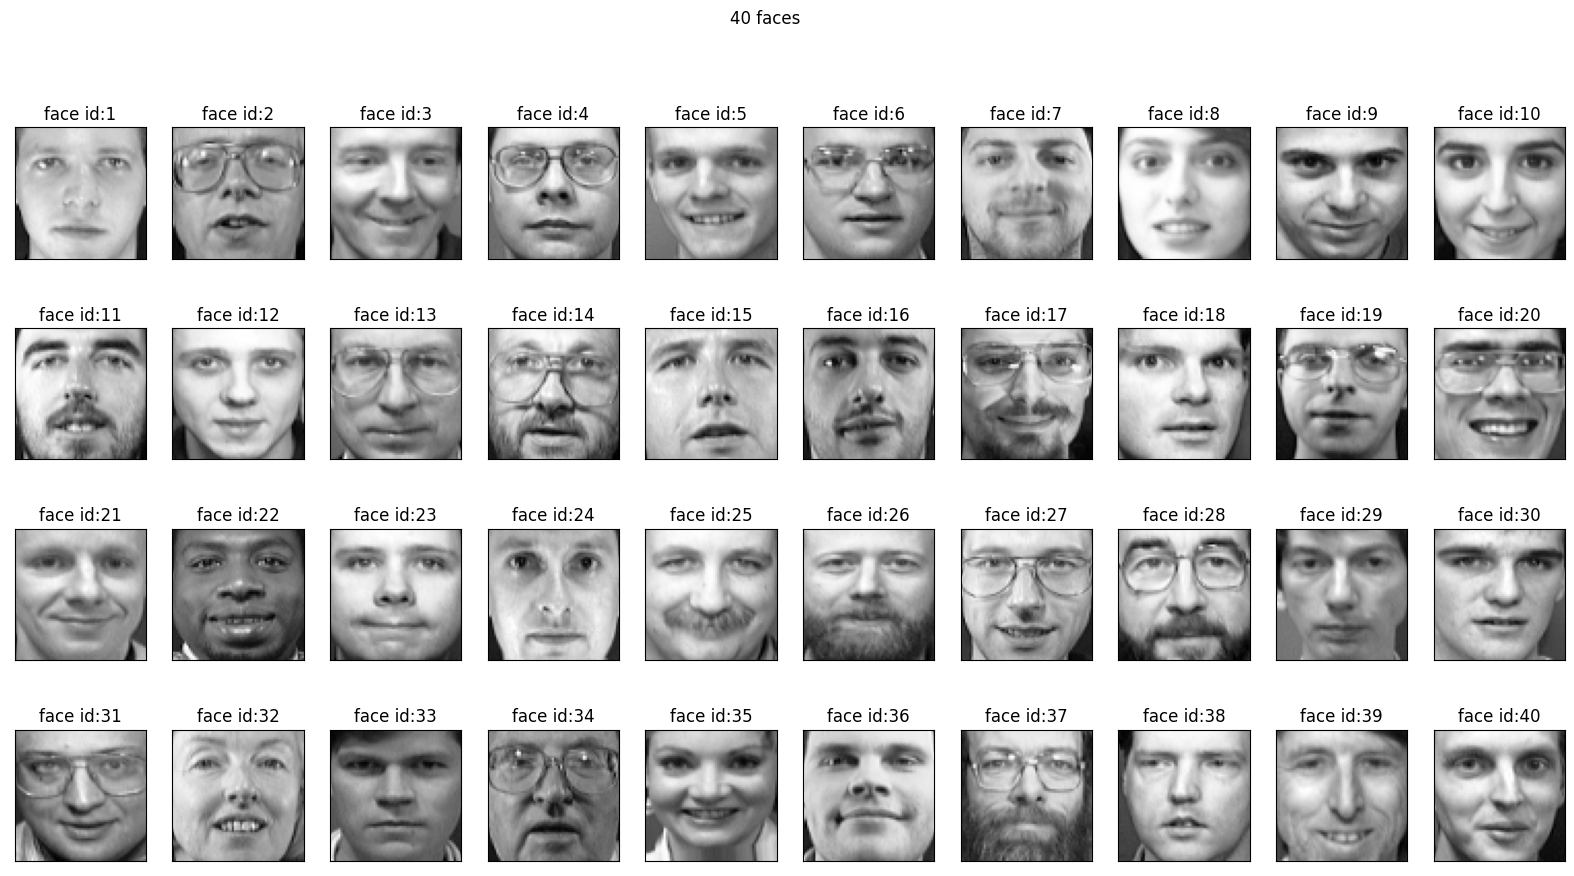

In [2]:
    fig, array=plt.subplots(nrows=4, ncols=10, figsize=(20, 10))
    array=array.flatten()
    
    for unique_id in np.unique(faces.target):
        image_index=unique_id*10
        image = faces.data[image_index]
        image = image.reshape(64, 64)
        array[unique_id].imshow(image , cmap='gray')
        array[unique_id].set_xticks([])
        array[unique_id].set_yticks([])
        array[unique_id].set_title("face id:{}".format(unique_id + 1))
    plt.suptitle("40 faces")

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [3]:
from sklearn.model_selection import train_test_split

X=faces.data.reshape(400, 4096)
X_train, X_test, y_train, y_test=train_test_split(X, faces.target, test_size=0.3, stratify=faces.target, random_state=0)

<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit(X)

PCA(n_components=100)

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

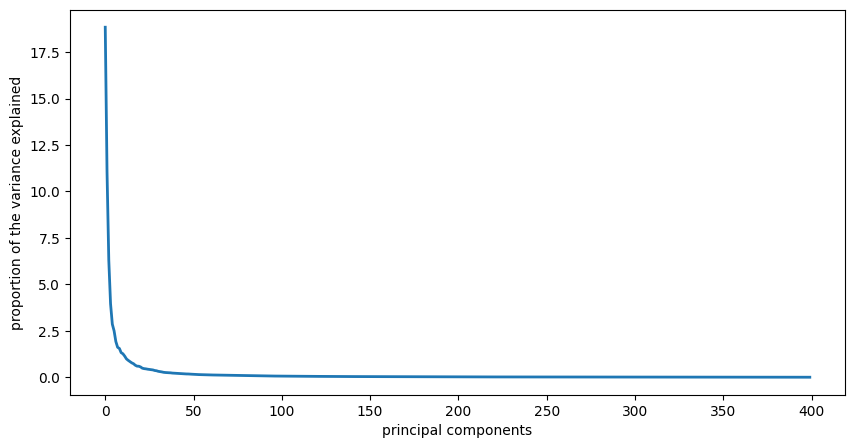

In [5]:
graph_pca=PCA()
graph_pca.fit(X)

plt.figure(1, figsize=(10,5))

plt.plot(graph_pca.explained_variance_, linewidth=2)
 
plt.xlabel('principal components')
plt.ylabel('proportion of the variance explained')
plt.show()

<font face="Verdana" size=4 style="color:darkblue"><div dir=ltr>
Ans: from the graph above we can see that about 100 and more PCA components show the same data. so we choose 100 for the number of components in our PCA model.

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

Text(0.5, 1.0, 'mean face')

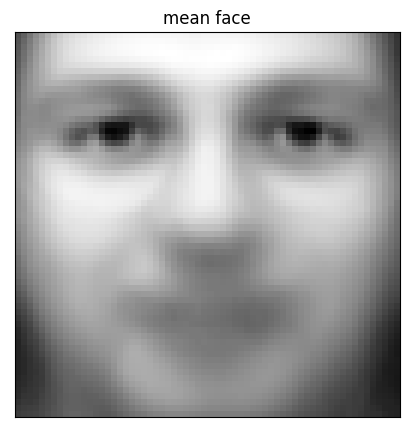

In [6]:
fig,ax=plt.subplots(1, 1, figsize=(5,5))

ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('mean face')

<font face="Verdana" size=4 style="color:darkblue"><div dir=ltr>
Ans: This vector  shows the empirical mean of every feature which is gained for the training set.


<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

Text(0.5, 0.98, 'All Eigen Faces')

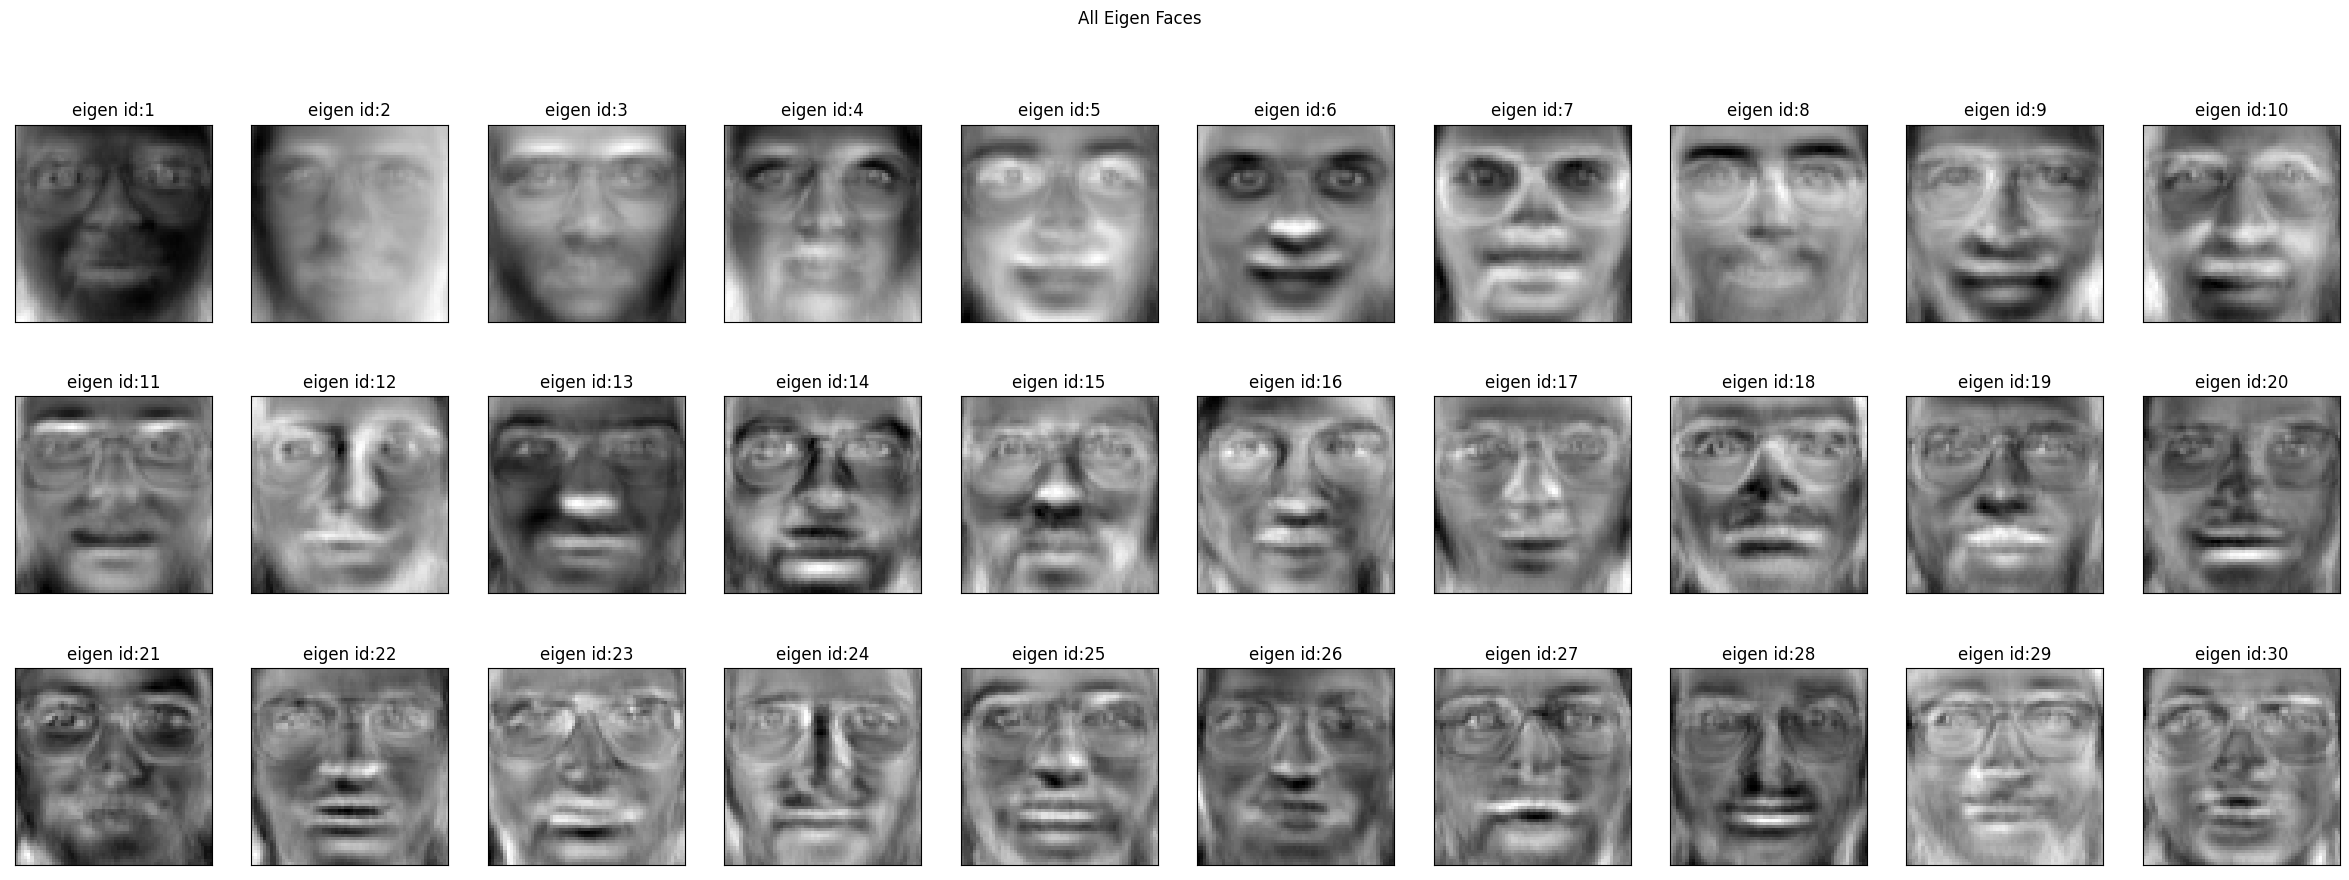

In [7]:
n_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((n_eigenfaces, 64, 64))

fig, axarr=plt.subplots(nrows=3, ncols=10, figsize=(30,10))
axarr=axarr.flatten()
for i in range(30):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i+1))
plt.suptitle("All Eigen Faces")

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [8]:
X_train = pca.transform(X_train)
X_test_new = pca.transform(X_test)

<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

"""
clf = svm.SVC(kernel='', C=?, degree=?, gamma=?)
clf.fit(X_train, y_train)

"""

clf = svm.SVC(kernel='rbf', C=1000, degree=2, gamma=0.0001)
#degree only works for poly kernel and will be ignored for rbf kernel.

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_new)
print("accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred)))

accuracy score:0.93


In [10]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2, 3 ,4, 5, 6, 7, 8, 9],
              'kernel': ['rbf', 'poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.179 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.107 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.161 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.125 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.089 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 2/5] END C=0

[CV 3/5] END C=0.1, degree=4, gamma=1, kernel=poly;, score=0.732 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=1, kernel=poly;, score=0.732 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=1, kernel=poly;, score=0.607 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.214 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.286 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.268 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.161 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.589 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.589 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.73

[CV 3/5] END C=0.1, degree=6, gamma=0.1, kernel=rbf;, score=0.286 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.1, kernel=rbf;, score=0.268 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=0.1, kernel=rbf;, score=0.161 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=0.1, kernel=poly;, score=0.429 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, score=0.411 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, score=0.357 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, score=0.411 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, sc

[CV 1/5] END C=0.1, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 2/5] END C=0.1, degree=8, gamma=0.1, kernel=poly;, score=0.214 total time=   0.0s
[CV 3/5] END C=0.1, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 4/5] END C=0.1, degree=8, gamma=0.1, kernel=poly;, score=0.446 total time=   0.0s
[CV 5/5] END C=0.1, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 1/5] END C=0.1, degree=8, gamma=0.01, kernel=rbf;, score=0.411 total time=   0.0s
[CV 2/5] END C=0.1, degree=8, gamma=0.01, kernel=rbf;, score=0.357 total time=   0.0s
[CV 3/5] END C=0.1, degree=8, gamma=0.01, kernel=rbf;, score=0.411 total time=   0.0s
[CV 4/5] END C=0.1, degree=8, gamma=0.01, kernel=rbf;, score=0.357 total time=   0.0s
[CV 5/5] END C=0.1, degree=8, gamma=0.01, kernel=rbf;, score=0.375 total time=   0.0s
[CV 1/5] END C=0.1, degree=8, gamma=0.01, kernel=poly;, score=0.107 total time=   0.0s
[CV 2/5] END C=0.1, degree=8, gamma=0.01, kernel=poly

[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=rbf;, score=0.446 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.857 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.875 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.857 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.01, kernel=rbf;, score=0.946 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.446 total time=

[CV 3/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.446 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.589 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.589 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.1, kernel=poly;, score=0.607 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.01, kernel=rbf;, score=0.929 total time=   

[CV 1/5] END C=1, degree=6, gamma=0.1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 2/5] END C=1, degree=6, gamma=0.1, kernel=rbf;, score=0.393 total time=   0.0s
[CV 3/5] END C=1, degree=6, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END C=1, degree=6, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 5/5] END C=1, degree=6, gamma=0.1, kernel=rbf;, score=0.446 total time=   0.0s
[CV 1/5] END C=1, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 2/5] END C=1, degree=6, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 3/5] END C=1, degree=6, gamma=0.1, kernel=poly;, score=0.429 total time=   0.0s
[CV 4/5] END C=1, degree=6, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=1, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 1/5] END C=1, degree=6, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END C=1, degree=6, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.

[CV 4/5] END C=1, degree=8, gamma=1, kernel=poly;, score=0.446 total time=   0.0s
[CV 5/5] END C=1, degree=8, gamma=1, kernel=poly;, score=0.357 total time=   0.0s
[CV 1/5] END C=1, degree=8, gamma=0.1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 2/5] END C=1, degree=8, gamma=0.1, kernel=rbf;, score=0.393 total time=   0.0s
[CV 3/5] END C=1, degree=8, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END C=1, degree=8, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 5/5] END C=1, degree=8, gamma=0.1, kernel=rbf;, score=0.446 total time=   0.0s
[CV 1/5] END C=1, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 2/5] END C=1, degree=8, gamma=0.1, kernel=poly;, score=0.214 total time=   0.0s
[CV 3/5] END C=1, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 4/5] END C=1, degree=8, gamma=0.1, kernel=poly;, score=0.446 total time=   0.0s
[CV 5/5] END C=1, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[

[CV 1/5] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.839 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.875 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.001, kernel=rbf;, scor

[CV 2/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.001, kernel=poly;, score=0.161 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.001, kernel=poly;, score=0.179 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.001, kernel=poly;, score=0.179 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.001, kernel=poly;, score=0.214 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.001, kernel=poly;, score=0.196 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.0001, kernel=rbf;, score=0.357 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.0001, kern

[CV 5/5] END C=10, degree=6, gamma=0.01, kernel=poly;, score=0.304 total time=   0.0s
[CV 1/5] END C=10, degree=6, gamma=0.001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=10, degree=6, gamma=0.001, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END C=10, degree=6, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 4/5] END C=10, degree=6, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=10, degree=6, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=10, degree=6, gamma=0.001, kernel=poly;, score=0.125 total time=   0.0s
[CV 2/5] END C=10, degree=6, gamma=0.001, kernel=poly;, score=0.089 total time=   0.0s
[CV 3/5] END C=10, degree=6, gamma=0.001, kernel=poly;, score=0.089 total time=   0.0s
[CV 4/5] END C=10, degree=6, gamma=0.001, kernel=poly;, score=0.196 total time=   0.0s
[CV 5/5] END C=10, degree=6, gamma=0.001, kernel=poly;, score=0.161 total time=   0.0s
[CV 1/5] END C=10, degree=6, gamma=0.0001, kernel

[CV 3/5] END C=10, degree=8, gamma=0.01, kernel=poly;, score=0.232 total time=   0.0s
[CV 4/5] END C=10, degree=8, gamma=0.01, kernel=poly;, score=0.161 total time=   0.0s
[CV 5/5] END C=10, degree=8, gamma=0.01, kernel=poly;, score=0.214 total time=   0.0s
[CV 1/5] END C=10, degree=8, gamma=0.001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=10, degree=8, gamma=0.001, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END C=10, degree=8, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 4/5] END C=10, degree=8, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=10, degree=8, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=10, degree=8, gamma=0.001, kernel=poly;, score=0.089 total time=   0.0s
[CV 2/5] END C=10, degree=8, gamma=0.001, kernel=poly;, score=0.054 total time=   0.0s
[CV 3/5] END C=10, degree=8, gamma=0.001, kernel=poly;, score=0.036 total time=   0.0s
[CV 4/5] END C=10, degree=8, gamma=0.001, kernel=po

[CV 2/5] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.875 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.001, kernel=rbf;, score=0.982 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=poly;, score=0.446 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.001, kernel=poly;, score=0.482 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.001

[CV 3/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.589 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.589 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.732 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.714 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.571 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.001, ker

[CV 3/5] END C=100, degree=6, gamma=0.1, kernel=poly;, score=0.429 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=100, degree=6, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=0.01, kernel=poly;, score=0.429 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=0.01, kernel=poly;, score=0.339 total time=   0.0s
[CV 3/5] END C=100, degree=6, gamma=0.01, kernel=poly;, score=0.375 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=0.01, kernel=po

[CV 3/5] END C=100, degree=8, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END C=100, degree=8, gamma=0.1, kernel=rbf;, score=0.589 total time=   0.0s
[CV 5/5] END C=100, degree=8, gamma=0.1, kernel=rbf;, score=0.482 total time=   0.0s
[CV 1/5] END C=100, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 2/5] END C=100, degree=8, gamma=0.1, kernel=poly;, score=0.214 total time=   0.0s
[CV 3/5] END C=100, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 4/5] END C=100, degree=8, gamma=0.1, kernel=poly;, score=0.446 total time=   0.0s
[CV 5/5] END C=100, degree=8, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 1/5] END C=100, degree=8, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=100, degree=8, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=100, degree=8, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=100, degree=8, gamma=0.01, kernel=rbf;, sc

[CV 2/5] END C=1000, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.875 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma

[CV 4/5] END C=1000, degree=4, gamma=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 5/5] END C=1000, degree=4, gamma=0.1, kernel=poly;, score=0.607 total time=   0.0s
[CV 1/5] END C=1000, degree=4, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=1000, degree=4, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=1000, degree=4, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=1000, degree=4, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=1000, degree=4, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=1000, degree=4, gamma=0.01, kernel=poly;, score=0.589 total time=   0.0s
[CV 2/5] END C=1000, degree=4, gamma=0.01, kernel=poly;, score=0.589 total time=   0.0s
[CV 3/5] END C=1000, degree=4, gamma=0.01, kernel=poly;, score=0.732 total time=   0.0s
[CV 4/5] END C=1000, degree=4, gamma=0.01, kernel=poly;, score=0.732 total time=   0.0s
[CV 5/5] END C=1000, degree=4, gamma=0.

[CV 5/5] END C=1000, degree=6, gamma=0.1, kernel=rbf;, score=0.482 total time=   0.0s
[CV 1/5] END C=1000, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 2/5] END C=1000, degree=6, gamma=0.1, kernel=poly;, score=0.357 total time=   0.0s
[CV 3/5] END C=1000, degree=6, gamma=0.1, kernel=poly;, score=0.429 total time=   0.0s
[CV 4/5] END C=1000, degree=6, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END C=1000, degree=6, gamma=0.1, kernel=poly;, score=0.464 total time=   0.0s
[CV 1/5] END C=1000, degree=6, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=1000, degree=6, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=1000, degree=6, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=1000, degree=6, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=1000, degree=6, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=1000, degree=6, gamma=0.01, k

[CV 1/5] END C=1000, degree=8, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.0s
[CV 2/5] END C=1000, degree=8, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END C=1000, degree=8, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END C=1000, degree=8, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END C=1000, degree=8, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END C=1000, degree=8, gamma=0.01, kernel=poly;, score=0.321 total time=   0.0s
[CV 2/5] END C=1000, degree=8, gamma=0.01, kernel=poly;, score=0.250 total time=   0.0s
[CV 3/5] END C=1000, degree=8, gamma=0.01, kernel=poly;, score=0.321 total time=   0.0s
[CV 4/5] END C=1000, degree=8, gamma=0.01, kernel=poly;, score=0.375 total time=   0.0s
[CV 5/5] END C=1000, degree=8, gamma=0.01, kernel=poly;, score=0.321 total time=   0.0s
[CV 1/5] END C=1000, degree=8, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END C=1000, degree=8, gamma=

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

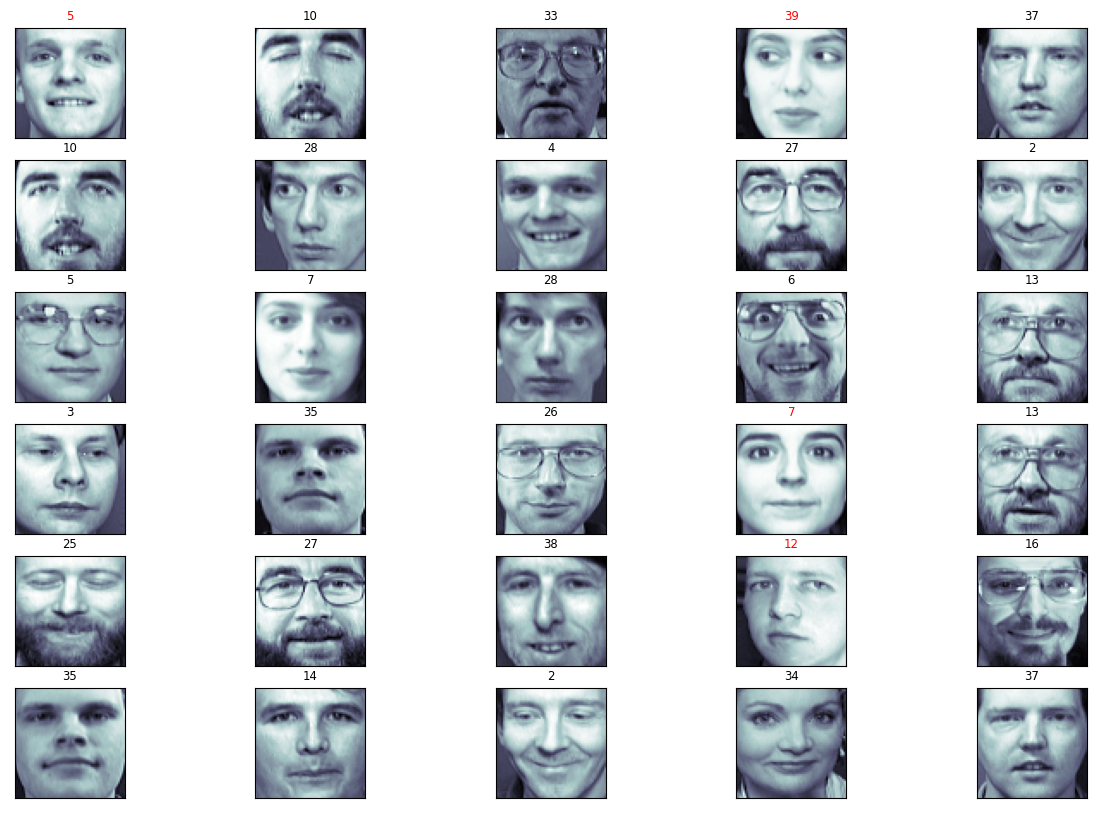

In [11]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_new[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_multi = label_binarize(faces.target, classes=range(40))
n_classes=y_multi.shape[1]

X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              y_multi,
                                                                                             test_size=0.3,
                                                                                             stratify=y_multi,
                                                                                     random_state=0)

pca=PCA(n_components=100, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

oneRestClassifier=OneVsRestClassifier(clf)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score = oneRestClassifier.decision_function(X_test_multiclass_pca)

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multiclass[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_multiclass.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test_multiclass, y_score, average="micro")

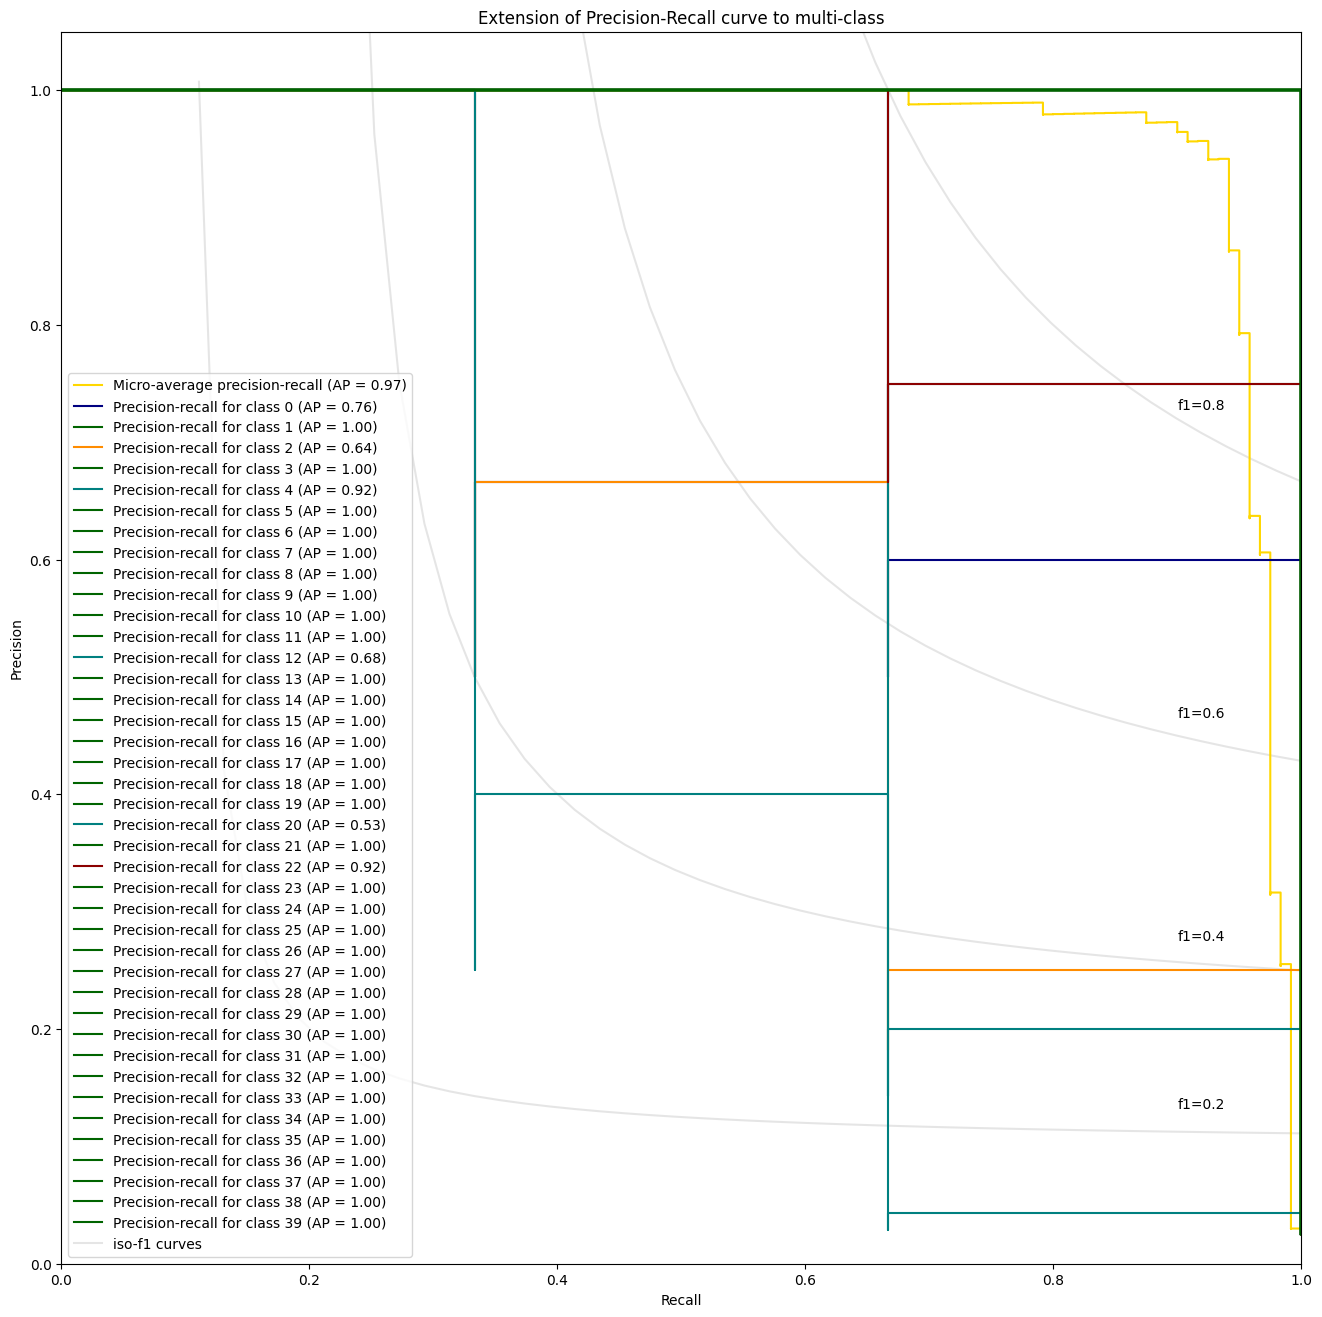

In [14]:
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal",'cyan','darkred','blue'])

_, ax = plt.subplots(figsize=(16, 16))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    if average_precision[i] == 1:
        display.plot(ax=ax, name=f"Precision-recall for class {i}", color='darkgreen')
    else:
        display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)


# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = 0.96

recall at the above threshold = 0.7

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [51]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier(n_estimators=30)
randomForestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score_rf = randomForestClassifier.predict_proba(X_test_multiclass_pca)

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_multiclass[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_multiclass.ravel(), y_score_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

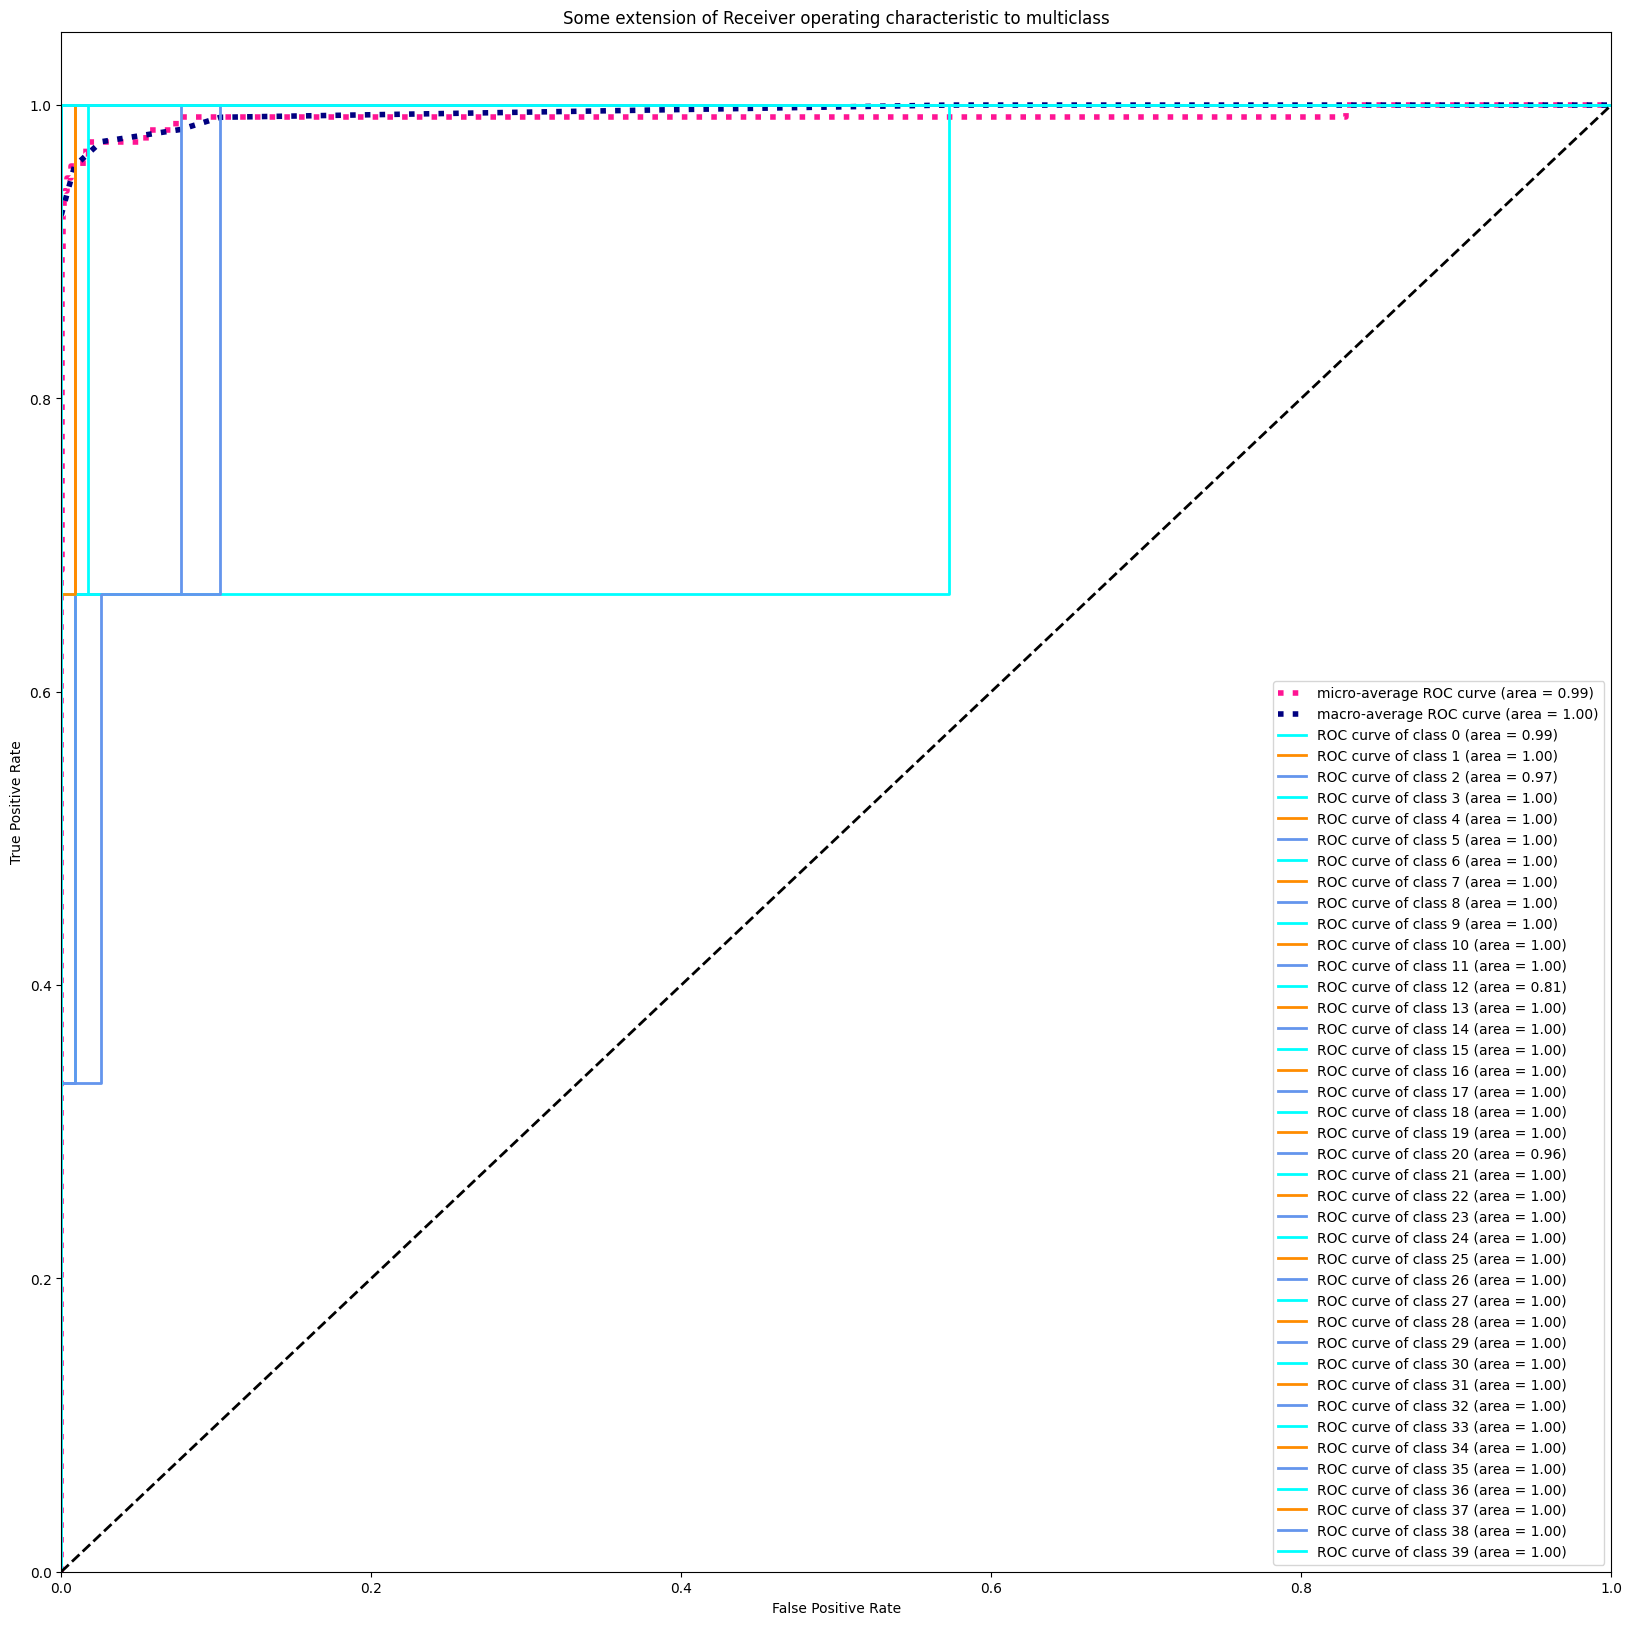

In [40]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20, 20),)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [58]:
print("SVM AUC =", roc_auc_score(y_test_multiclass, y_score))
print("Random Forest AUC =", roc_auc_score(y_test_multiclass, y_score_rf[:][1]))

SVM AUC = 0.993091168091168
Random Forest AUC = 0.665954415954416


<font face="Verdana" size=4 style="color:darkblue"><div dir=ltr>
Ans: as we see SVM AUC is a lot better than the Random Forest.

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [61]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_new)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [64]:
# TODO: calculate conf_mx then print it
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


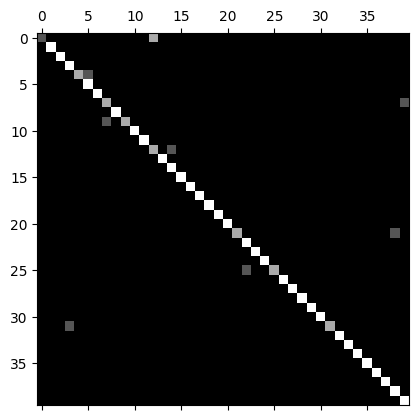

In [65]:
# TODO: after calculating confusion matrix, visualize it using below code

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [72]:
# TODO: calculate norm_conf_mx then print it
norm_conf_mx = conf_mx.astype('float') / conf_mx.sum(axis=1)[:, np.newaxis]

norm_conf_mx = confusion_matrix(y_test, y_pred, normalize='all')

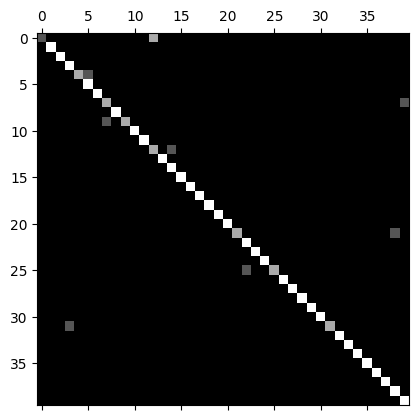

In [73]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()